## Final Project Submission

Please fill out:
* Student name: Charlotte Basch
* Student pace: self paced / part time / <strong> full time </strong>
* Scheduled project review date/time: 
* Instructor name: James Irving 
* Blog post URL: https://charsarb.github.io/data_cleaning


# Introduction

# Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import r2_score
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

C:\Users\charlotte\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import data
data = pd.read_csv("kc_house_data.csv")
display(data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [3]:
#View the data types of each column and number of rows and columns in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Look for any suspicious values and count the number of unique
#values for each column
for col in data.columns:
    val_counts = data[col].value_counts()
    index_list = []
    value_list = []
    print(f"Number of unique {col} values: {data[col].nunique()}")
    for index, value in val_counts.items():
        index_list.append(index)
        value_list.append(value)
    df = pd.DataFrame({col: index_list, "count": value_list})
    df = df.sort_values(by=["count"], ascending=False)
    display(df.head())

Number of unique id values: 21420


,id,count
0,795000620,3
89,6141100320,2
113,9238500040,2
114,3935900232,2
115,6791200120,2


Number of unique date values: 372


,date,count
0,6/23/2014,142
2,6/25/2014,131
1,6/26/2014,131
3,7/8/2014,127
4,4/27/2015,126


Number of unique price values: 3622


,price,count
0,350000.000,172
1,450000.000,172
2,550000.000,159
3,500000.000,152
4,425000.000,150


Number of unique bedrooms values: 12


,bedrooms,count
0,3,9824
1,4,6882
2,2,2760
3,5,1601
4,6,272


Number of unique bathrooms values: 29


,bathrooms,count
0,2.500,5377
1,1.000,3851
2,1.750,3048
3,2.250,2047
4,2.000,1930


Number of unique sqft_living values: 1034


,sqft_living,count
0,1300,138
1,1400,135
2,1440,133
3,1660,129
4,1010,129


Number of unique sqft_lot values: 9776


,sqft_lot,count
0,5000,358
1,6000,290
2,4000,251
3,7200,220
4,7500,119


Number of unique floors values: 6


,floors,count
0,1.000,10673
1,2.000,8235
2,1.500,1910
3,3.000,611
4,2.500,161


Number of unique waterfront values: 2


,waterfront,count
0,0.000,19075
1,1.000,146


Number of unique view values: 5


,view,count
0,0.000,19422
1,2.000,957
2,3.000,508
3,1.000,330
4,4.000,317


Number of unique condition values: 5


,condition,count
0,3,14020
1,4,5677
2,5,1701
3,2,170
4,1,29


Number of unique grade values: 11


,grade,count
0,7,8974
1,8,6065
2,9,2615
3,6,2038
4,10,1134


Number of unique sqft_above values: 942


,sqft_above,count
0,1300,212
1,1010,210
2,1200,206
3,1220,192
4,1140,184


Number of unique sqft_basement values: 304


,sqft_basement,count
0,0.0,12826
1,?,454
2,600.0,217
3,500.0,209
4,700.0,208


Number of unique yr_built values: 116


,yr_built,count
0,2014,559
1,2006,453
2,2005,450
3,2004,433
4,2003,420


Number of unique yr_renovated values: 70


,yr_renovated,count
0,0.000,17011
1,2014.000,73
2,2003.000,31
3,2013.000,31
4,2007.000,30


Number of unique zipcode values: 70


,zipcode,count
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553


Number of unique lat values: 5033


,lat,count
0,47.662,17
2,47.532,17
3,47.685,17
1,47.549,17
4,47.671,16


Number of unique long values: 751


,long,count
0,-122.290,115
1,-122.300,111
2,-122.362,104
3,-122.291,100
4,-122.372,99


Number of unique sqft_living15 values: 777


,sqft_living15,count
0,1540,197
1,1440,195
2,1560,192
3,1500,180
4,1460,169


Number of unique sqft_lot15 values: 8682


,sqft_lot15,count
0,5000,427
1,4000,356
2,6000,288
3,7200,210
4,4800,145


In [5]:
#Given that the sqft_basement variable has a ? in its data, replace it with null values
data = data.replace("?", np.nan)
#Since we have zipcode to indicate location, drop latitude and longitude 
#The number of times the house is viewed is not something a buyer or seller can control or sometimes even access
#so we will drop it
#id will also not be a predictor so drop it as well 
data = data.drop(columns=["lat", "long", "id", "view"])

In [6]:
#See how many null values are in each column
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#Check the percentage of null values for each column
#An accepted cutoff for dropping null rows is if less than 5% is missing
#If a large amount of data is missing, the column can be dropped
def find_percent_null(df):
    null_nums = df.isnull().sum()
    total_rows = df.shape[0]
    for index, value in null_nums.items():
        if value != 0:
            percent_missing = round((value/total_rows)*100, 2)
            print(f"{percent_missing}% of {index} values are missing.")

#It appears we can drop the missing values for view and sqft_basement but cannot drop any of the columns
find_percent_null(data)

11.0% of waterfront values are missing.
2.1% of sqft_basement values are missing.
17.79% of yr_renovated values are missing.


In [8]:
def change_col_type(df, col_list, data_type):
    for col in col_list:
        df[col] = df[col].astype(data_type)

In [9]:
#Drop the rows where view is missing
data = data.dropna(subset=["sqft_basement"])
#find_percent_null(data)

#change the data type of sqft_basement
change_col_type(data, ["sqft_basement"], "float")
#find_percent_null(data)

#Replace the yr_renovated and waterfront with most common values
data["waterfront"] = data["waterfront"].fillna(data["waterfront"].mode()[0])
data["yr_renovated"] = data["yr_renovated"].fillna(data["yr_renovated"].mode()[0])
#find_percent_null(data)

In [10]:
#Make columns to indicate the year each house was sold
dates = list(data["date"].map(lambda x: x.split("/")))
months = list(map(lambda date: date[0], dates))
years = list(map(lambda date: date[2], dates))
data["year_sold"] = years
data["month_sold"] = months
#Change the type of the columns from string to integer
change_col_type(data, ["year_sold", "month_sold"], "int")

#get rid of the date column now that we have obtained the information we want
data = data.drop(columns=["date"])

In [11]:
#create columns for house age when purchased
data["house_age"] = data["year_sold"] - data["yr_built"]

#Since most of the houses have not been renovated, simply track if they have or have not
data["renovated"] = data["yr_renovated"].map(lambda x: 0 if x==0 else 1)

#Likewise most of the houses do not have basements so view houses in terms of having or not having basements
data["has_basement"] = data["sqft_basement"].map(lambda x: 0 if x==0 else 1)

#Drop yr_built, year_sold, sqft_basememnt, and yr_renovated now that they have been replaced with new colummns 
data = data.drop(columns=["yr_built", "yr_renovated", "sqft_basement", "year_sold"])

# Commented

In [12]:
#See each variable plotted against price to check the linearity assumption
# for col in data.columns:
#     if col != "price":
#         g = sns.jointplot(col, "price", data=data, kind="reg", line_kws = {"color": 'black'})
#         g.fig.suptitle(f"{col} vs Price")
# #It does not appear all of the relationships are linear but for not we will leave all variables in the model

In [13]:
#Change categorical data from numerical to string to aid in our later analyses
#categorical_cols = ["waterfront", "zipcode", "renovated", "has_basement", "condition", "month_sold", "grade"]
categorical_cols = ["waterfront", "zipcode", "renovated", "has_basement"]
#Create a new dataframe with only predictors
predictors = data.copy().drop(columns=["price"])

#Seperate out the numeric columns
qual_predictors = predictors.copy().drop(columns=categorical_cols)

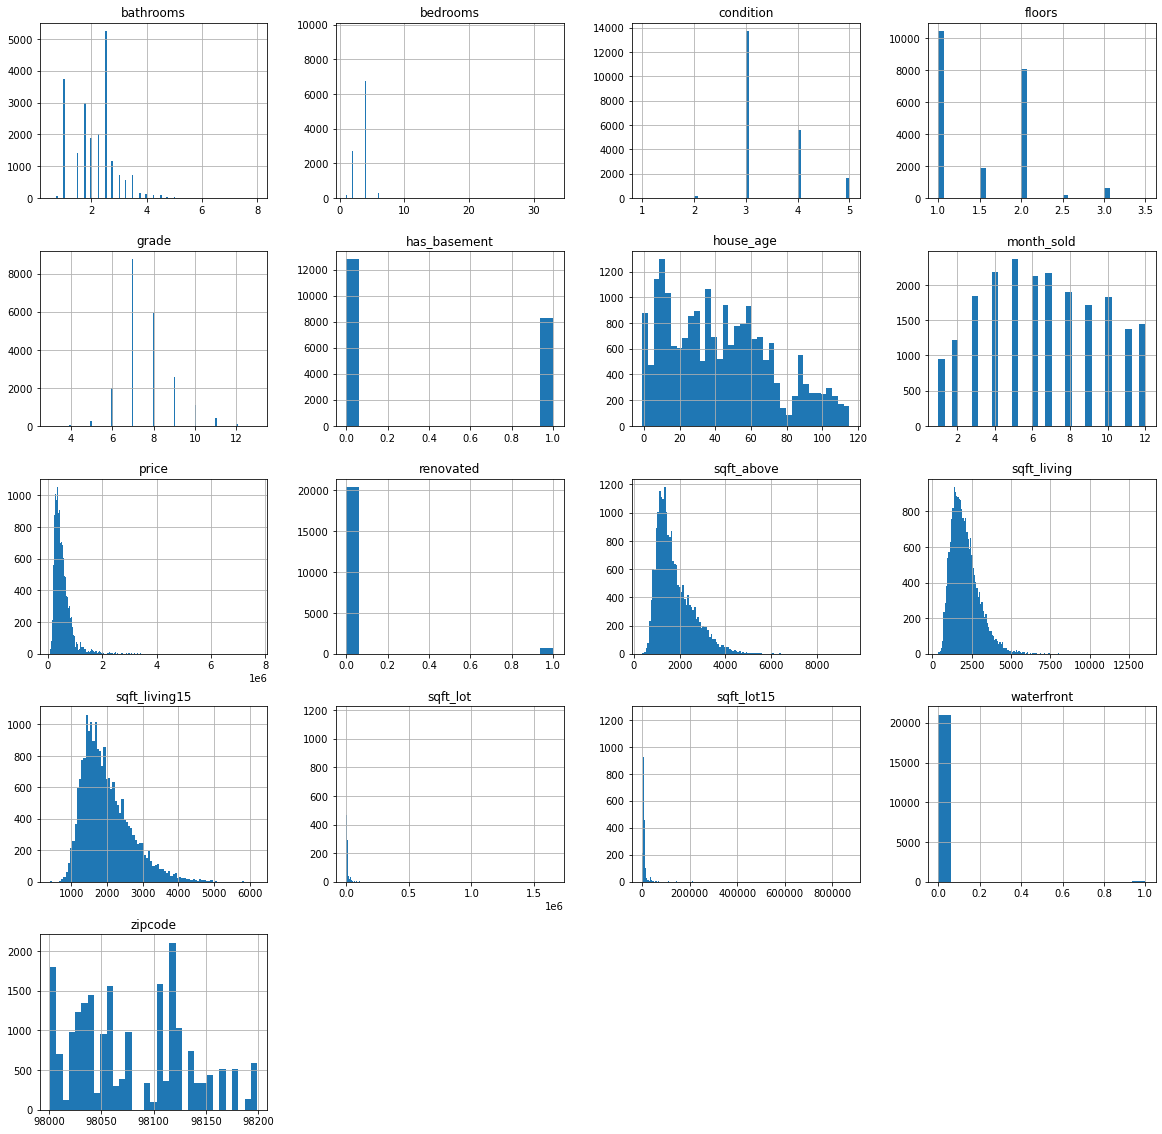

In [14]:
#Look at the distribution of each of our variables
#While they are not required to be normal, this may indicate the data might need to be transformed
data.hist(figsize=(20,20), bins="auto");

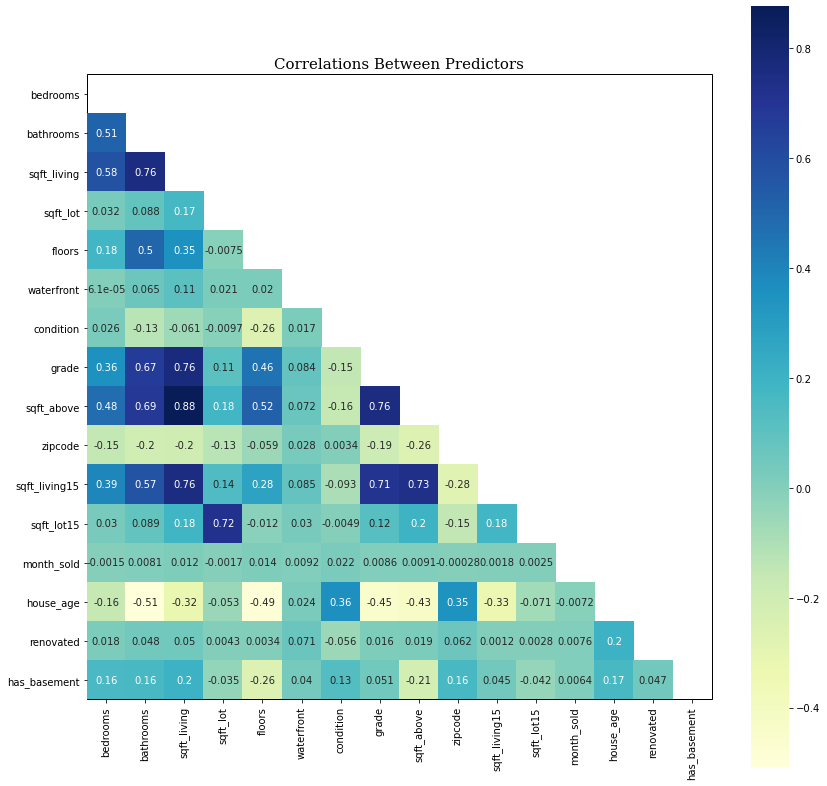

In [15]:
#Create a heatmap to display the correlations and check for multicollinearity 
#assuming any correlation above .65 is highly correlated, and correlations above .5 should be examined
#However for this inital model we will leave in all variables to get a general sense of an inital model
def create_heatmap(predictors):
    corr = predictors.corr()
    fig, ax = plt.subplots(figsize=(14,14))
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="YlGnBu")
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('1')
    ax.set_title("Correlations Between Predictors", fontsize=15, fontfamily="serif");
create_heatmap(predictors)

In [16]:
#Create regression model and check the normality and homoscedasticity assumptions
def create_regression_and_check_assumptions(x_cols, outcome, df):
    predictors = ""
    for col in x_cols:
        if col in categorical_cols:
            predictors = predictors+"C("+col+")+"
        else:
            predictors = predictors+col+"+"
    predictors = predictors[:-1]
    formula = outcome + "~" + predictors
    model = ols(formula=formula, data=df).fit()
    display(model.summary())
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    #Visualize the residuals compared to a normal distribution
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=axes[0]);
    axes[0].set_title("Normality")
    #plot the residuals versus the outcome values
    plt.scatter(df[outcome], model.resid);
    axes[1].set_title("Homoscedasticity")
    axes[1].set(xlabel=outcome, ylabel="Residuals")
    
    #Numerically test if the residuals are normal
    stat, p_val_n = stats.normaltest(model.resid)
    if p_val_n < .05:
        print(f"The residuals are not normally distributed, p = {p_val_n}.")
    else:
        print(f"The residuals are normally distributed, p = {p_val_n}.") 
    #Numerically test if the model is homoskedastic, 
    #from https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab
    bp_test = het_breuschpagan(model.resid, df[x_cols])
    p_val_h = bp_test[1]
    if p_val_h < .05:
        print(f"The model is heteroskedastic, p = {p_val_h}.")
    else:
        print(f"The model is homoskedastic, p = {p_val_h}.") 
    return model

        
#Tests how much a variable is correlated with the other predictors
#A VIF value over 5 indicates severe multicolinearity 
def calc_variance_inflation_factor(df, x_cols):
    X = df[x_cols]
    X = sm.add_constant(X)
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_scores = list(zip(x_cols, vif))
    for item in vif_scores:
        if item[1] > 6:
            print(item)

# Initial Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     998.3
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:33:51   Log-Likelihood:            -2.8399e+05
No. Observations:               21143   AIC:                         5.682e+05
Df Residuals:                   21058   BIC:                         5.688e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.972e+05   1.69e+04    -35.270      0.000    -6.3e+05   -5.64e+05
C(waterfront)[T.1.0]  8.561e+05   1.44e+04     59.490      0.000    8.28e+05    8.84e+05
C(zipcode)[T.98002]   3.074e+04   1.47e+04      2.089      0.037    1897.144    5.96e+04
C(zipcode)[T.98003]  -1.303e+04   1.33e+04     -0.977      0.329   -3.92e+04    1.31e+04
C(zipcode)[T.98004]   7.595e+05    1.3e+04     58.412      0.000    7.34e+05    7.85e+05
C(zipcode)[T.98005]   2.782e+05   1.57e+04     17.751      0.000    2.47e+05    3.09e+05
C(zipcode)[T.98006]   2.621e+05   1.18e+04     22.226      0.000    2.39e+05    2.85e+05
C(zipcode)[T.98007]   2.276e+05   1.66e+04     13.705      0.000    1.95e+05     2.6e+05
C(zipcode)[T.98008]    2.55e+05   1.33e+04     19.158      0.000    2.29e+05    2.81e+05
C(zipcode)[T.98010]    6.47e+04    1.9e+04      3.411      0.001    2.75e+04    1.02e+05
C(zipcode)[T.98011]   1.116e+05   1.49e+04      7.513      0.000    8.25e+04    1.41e+05
C(zipcode)[T.98014]   1.039e+05   1.76e+04      5.890      0.000    6.93e+04    1.39e+05
C(zipcode)[T.98019]   8.166e+04    1.5e+04      5.444      0.000    5.23e+04    1.11e+05
C(zipcode)[T.98022]   1.434e+04   1.42e+04      1.008      0.313   -1.35e+04    4.22e+04
C(zipcode)[T.98023]  -3.685e+04   1.16e+04     -3.185      0.001   -5.95e+04   -1.42e+04
C(zipcode)[T.98024]    1.49e+05   2.08e+04      7.153      0.000    1.08e+05     1.9e+05
C(zipcode)[T.98027]   1.545e+05   1.22e+04     12.690      0.000    1.31e+05    1.78e+05
C(zipcode)[T.98028]   1.146e+05   1.33e+04      8.615      0.000    8.85e+04    1.41e+05
C(zipcode)[T.98029]   2.004e+05    1.3e+04     15.449      0.000    1.75e+05    2.26e+05
C(zipcode)[T.98030]    660.8300   1.37e+04      0.048      0.961   -2.61e+04    2.74e+04
C(zipcode)[T.98031]   8849.5257   1.34e+04      0.658      0.510   -1.75e+04    3.52e+04
C(zipcode)[T.98032]   6611.7685   1.73e+04      0.381      0.703   -2.74e+04    4.06e+04
C(zipcode)[T.98033]   3.598e+05    1.2e+04     30.097      0.000    3.36e+05    3.83e+05
C(zipcode)[T.98034]   2.048e+05   1.14e+04     18.035      0.000    1.83e+05    2.27e+05
C(zipcode)[T.98038]   2.457e+04   1.12e+04      2.188      0.029    2557.772    4.66e+04
C(zipcode)[T.98039]   1.274e+06   2.54e+04     50.072      0.000    1.22e+06    1.32e+06
C(zipcode)[T.98040]   5.058e+05   1.36e+04     37.286      0.000    4.79e+05    5.32e+05
C(zipcode)[T.98042]   -704.3474   1.13e+04     -0.062      0.950   -2.29e+04    2.15e+04
C(zipcode)[T.98045]   9.647e+04   1.44e+04      6.723      0.000    6.83e+04    1.25e+05
C(zipcode)[T.98052]    2.11e+05   1.13e+04     18.691      0.000    1.89e+05    2.33e+05
C(zipcode)[T.98053]   1.747e+05   1.22e+04     14.279      0.000    1.51e+05    1.99e+05
C(zipcode)[T.98055]   4.602e+04   1.35e+04      3.406    

The residuals are not normally distributed, p = 0.0.
The model is heteroskedastic, p = 0.0.


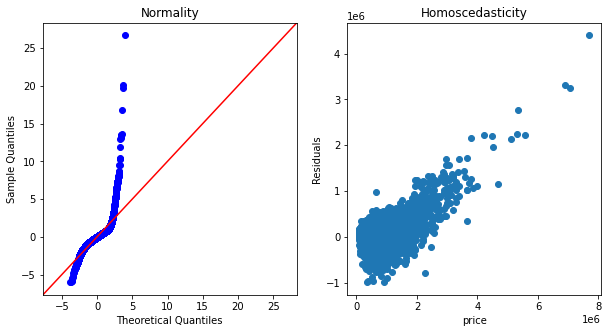

In [17]:
#Seperate the outcome variable (price) and the predictors and creates a regression model 
outcome = "price"
x_cols = list(data.columns)
x_cols.remove(outcome)

create_regression_and_check_assumptions(x_cols, outcome, data)

In [18]:
#Check how bad the multicollinearity is
calc_variance_inflation_factor(data, x_cols)         
#It appears some of our variables are highly correlated

('bedrooms', 4373742.308492941)
('sqft_lot', 16.85561093807409)
('zipcode', 16.534558752169442)


# Refining the Model

In [19]:
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
Q1 = qual_predictors.quantile(0.25)
Q3 = qual_predictors.quantile(0.75)
IQR = Q3 - Q1

In [20]:
outlier_indices = ((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)

In [21]:
cleaned_data = data[~outlier_indices]
display(cleaned_data.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,month_sold,house_age,renovated,has_basement
0,221900.000,3,1.000,1180,5650,1.000,0.000,3,7,1180,98178,1340,5650,10,59,0,0
1,538000.000,3,2.250,2570,7242,2.000,0.000,3,7,2170,98125,1690,7639,12,63,1,1
2,180000.000,2,1.000,770,10000,1.000,0.000,3,6,770,98028,2720,8062,2,82,0,0
3,604000.000,4,3.000,1960,5000,1.000,0.000,5,7,1050,98136,1360,5000,12,49,0,1
4,510000.000,3,2.000,1680,8080,1.000,0.000,3,8,1680,98074,1800,7503,2,28,0,0


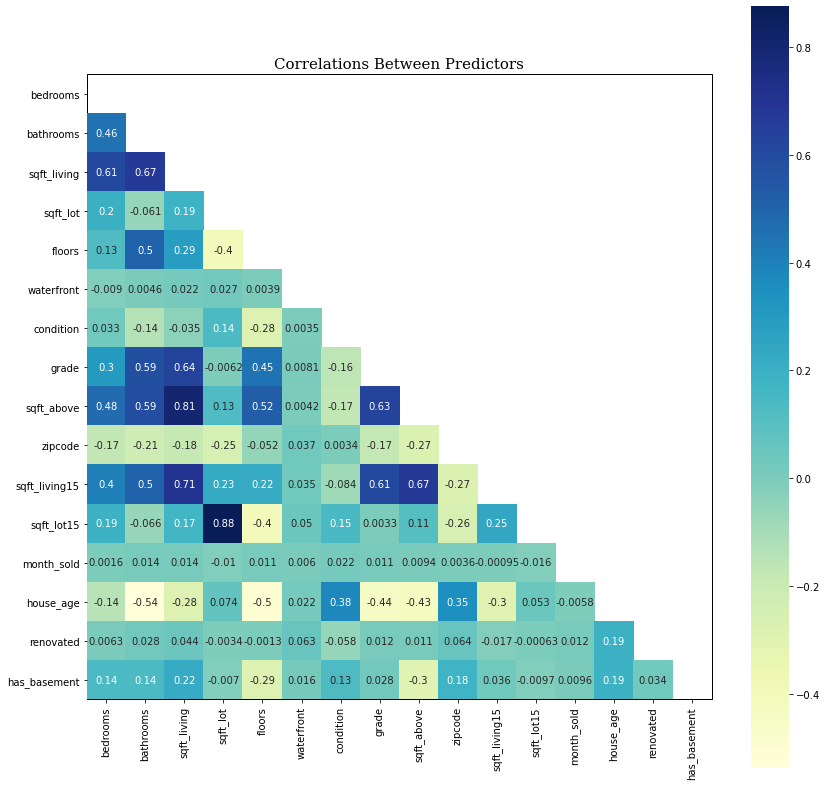

In [22]:
#Look at the correlations between the preditors 
predictors = cleaned_data.copy()
predictors = predictors.drop(columns=["price"])
create_heatmap(predictors)
#There are still some high correlations

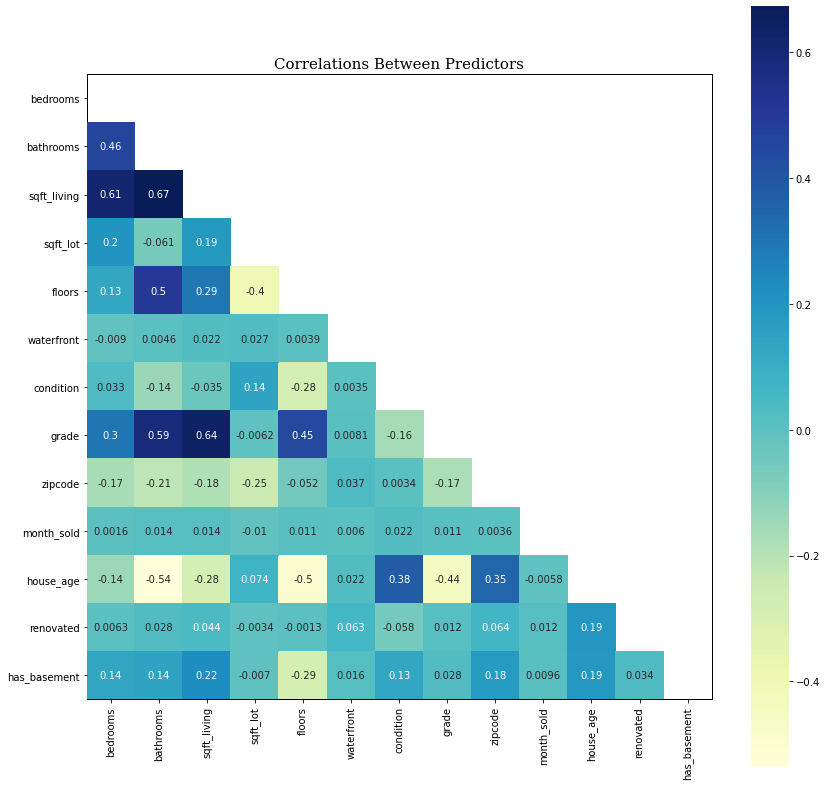

In [23]:
#Since sqft_living15 is highly correlated with multiple variables and is not specific to the house,
#it can be dropped. Similarly, we can drop sqft_lot15. Both these factors 
#cannot be controlled by the buyer or seller, so they provide limited use.
#The data provided by sqft_above is captured in the
#total and whether or not there is a basement, so it can be dropped
predictors = predictors.drop(columns=["sqft_living15", "sqft_above", "sqft_lot15"])
create_heatmap(predictors)

# Commented

In [25]:
cleaned_data = cleaned_data.drop(columns=["sqft_living15", "sqft_above", "sqft_lot15"])

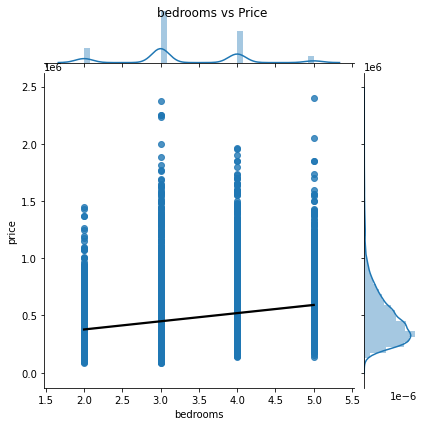

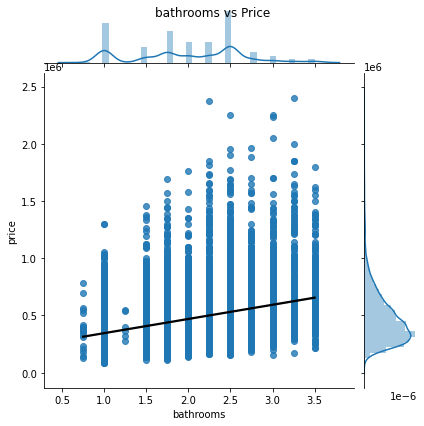

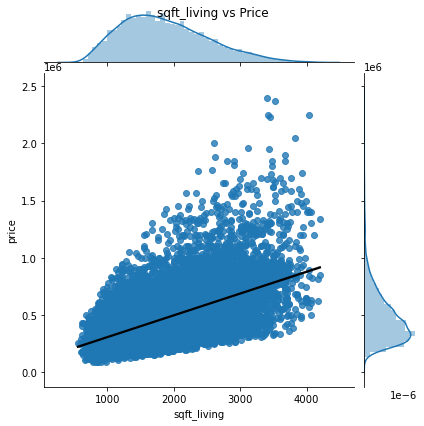

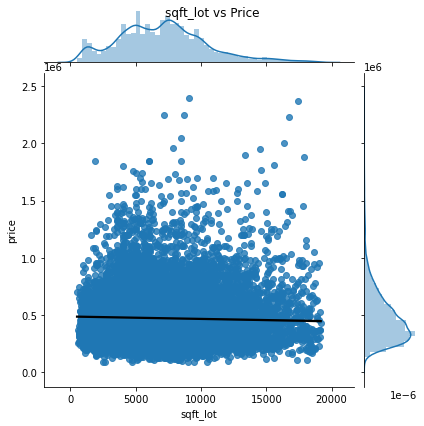

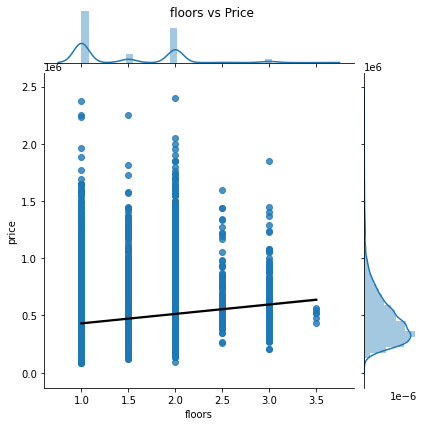

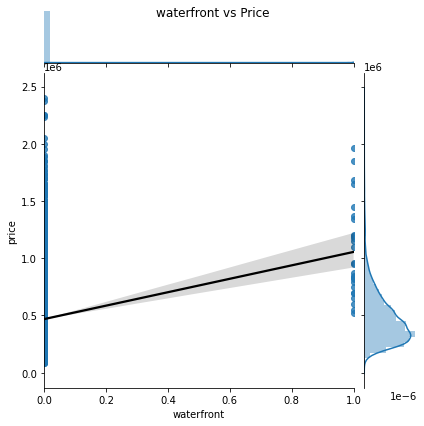

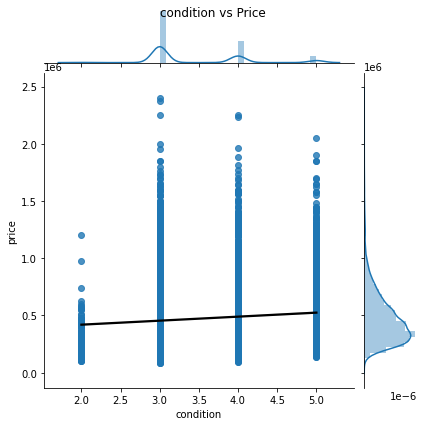

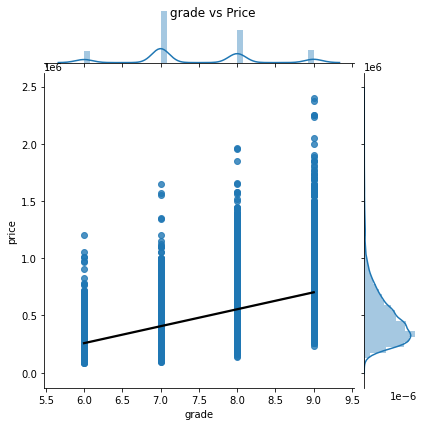

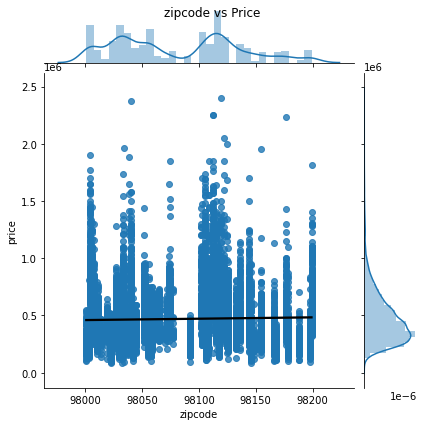

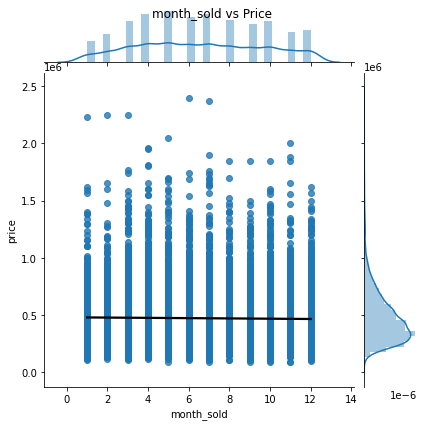

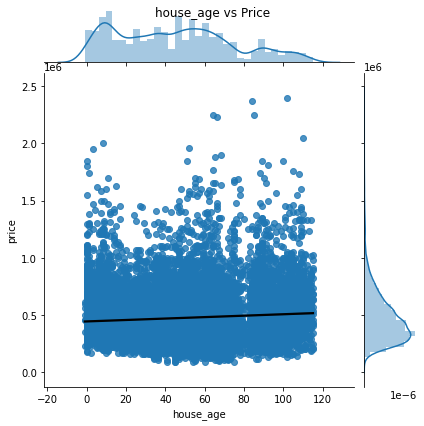

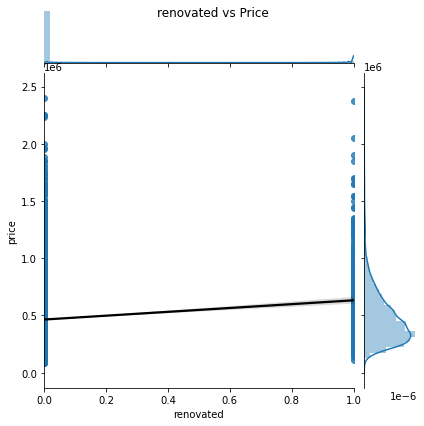

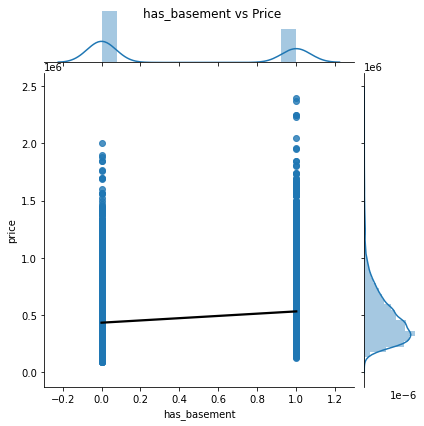

In [26]:
for col in predictors.columns:
    g = sns.jointplot(col, "price", data=cleaned_data, kind="reg", line_kws = {"color": 'black'})
    g.fig.suptitle(f"{col} vs Price")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     797.9
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:37:17   Log-Likelihood:            -2.1587e+05
No. Observations:               16668   AIC:                         4.319e+05
Df Residuals:                   16587   BIC:                         4.325e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.422e+05   1.33e+04    -40.891      0.000   -5.68e+05   -5.16e+05
C(waterfront)[T.1.0]  5.454e+05      2e+04     27.284      0.000    5.06e+05    5.85e+05
C(zipcode)[T.98002]   1.493e+04   9916.963      1.505      0.132   -4511.167    3.44e+04
C(zipcode)[T.98003]   3192.2472   8983.368      0.355      0.722   -1.44e+04    2.08e+04
C(zipcode)[T.98004]    5.96e+05      1e+04     59.460      0.000    5.76e+05    6.16e+05
C(zipcode)[T.98005]   3.143e+05   1.15e+04     27.233      0.000    2.92e+05    3.37e+05
C(zipcode)[T.98006]   2.668e+05   8572.464     31.122      0.000     2.5e+05    2.84e+05
C(zipcode)[T.98007]   2.333e+05   1.15e+04     20.299      0.000    2.11e+05    2.56e+05
C(zipcode)[T.98008]   2.426e+05   9041.471     26.835      0.000    2.25e+05     2.6e+05
C(zipcode)[T.98010]   8.006e+04   1.75e+04      4.571      0.000    4.57e+04    1.14e+05
C(zipcode)[T.98011]   1.414e+05      1e+04     14.094      0.000    1.22e+05    1.61e+05
C(zipcode)[T.98014]   9.575e+04   1.84e+04      5.208      0.000    5.97e+04    1.32e+05
C(zipcode)[T.98019]   9.854e+04   1.08e+04      9.095      0.000    7.73e+04     1.2e+05
C(zipcode)[T.98022]   1.077e+04   1.07e+04      1.006      0.314   -1.02e+04    3.18e+04
C(zipcode)[T.98023]  -1.614e+04   7887.124     -2.046      0.041   -3.16e+04    -679.397
C(zipcode)[T.98024]   1.272e+05   2.32e+04      5.488      0.000    8.18e+04    1.73e+05
C(zipcode)[T.98027]   2.338e+05   9600.846     24.357      0.000    2.15e+05    2.53e+05
C(zipcode)[T.98028]   1.293e+05   9074.423     14.245      0.000    1.11e+05    1.47e+05
C(zipcode)[T.98029]   2.304e+05   8916.607     25.840      0.000    2.13e+05    2.48e+05
C(zipcode)[T.98030]   8178.4090   9113.008      0.897      0.369   -9684.062     2.6e+04
C(zipcode)[T.98031]   1.245e+04   9034.965      1.377      0.168   -5264.018    3.02e+04
C(zipcode)[T.98032]  -6756.9747   1.17e+04     -0.577      0.564   -2.97e+04    1.62e+04
C(zipcode)[T.98033]   3.272e+05   8410.725     38.899      0.000    3.11e+05    3.44e+05
C(zipcode)[T.98034]   1.903e+05   7753.789     24.549      0.000    1.75e+05    2.06e+05
C(zipcode)[T.98038]   4.483e+04   7806.738      5.743      0.000    2.95e+04    6.01e+04
C(zipcode)[T.98039]    8.09e+05   2.81e+04     28.836      0.000    7.54e+05    8.64e+05
C(zipcode)[T.98040]   4.687e+05   1.05e+04     44.593      0.000    4.48e+05    4.89e+05
C(zipcode)[T.98042]   1.682e+04   7910.735      2.126      0.033    1316.125    3.23e+04
C(zipcode)[T.98045]   1.004e+05   1.08e+04      9.271      0.000    7.92e+04    1.22e+05
C(zipcode)[T.98052]     2.5e+05   7821.894     31.957      0.000    2.35e+05    2.65e+05
C(zipcode)[T.98053]   2.601e+05   9515.208     27.340      0.000    2.41e+05    2.79e+05
C(zipcode)[T.98055]   4.399e+04   9246.659      4.757    

The residuals are not normally distributed, p = 0.0.
The model is heteroskedastic, p = 0.0.


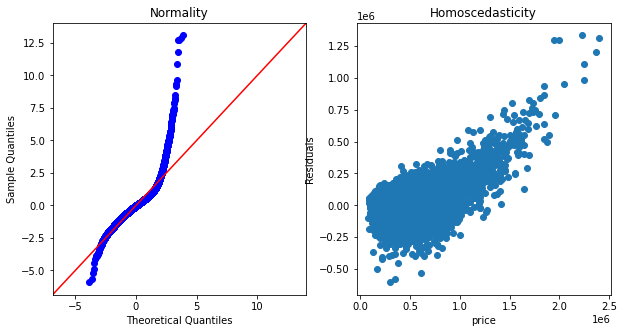

In [27]:
x_cols_2 = list(cleaned_data.columns)
x_cols_2.remove(outcome)
x_cols_2.remove("month_sold")
create_regression_and_check_assumptions(x_cols_2, outcome, cleaned_data)

('bedrooms', 4328416.388357376)


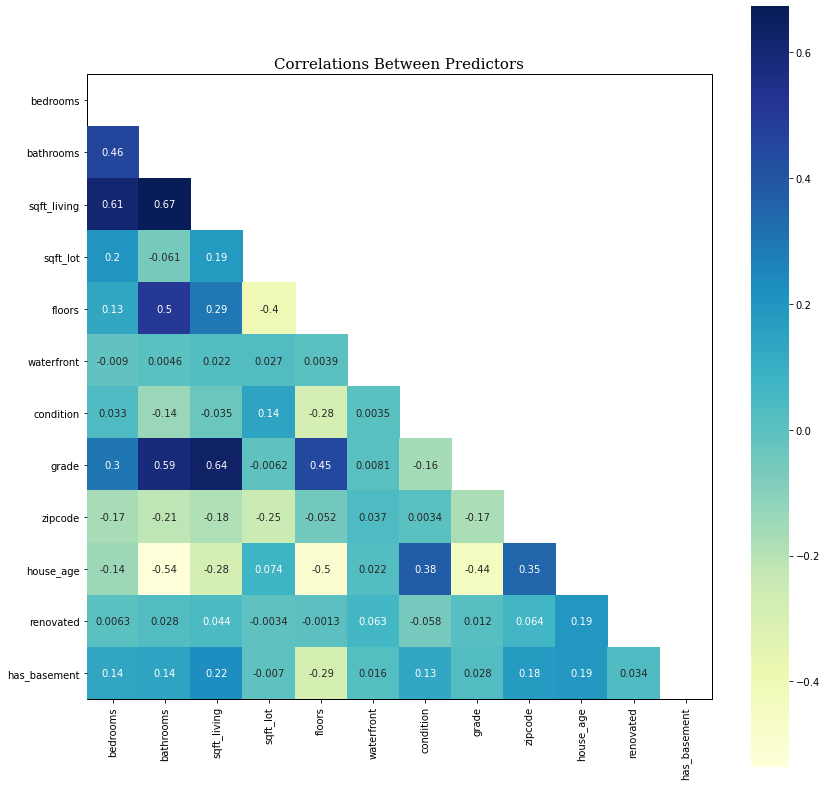

In [28]:
#Check how bad the multicollinearity is
calc_variance_inflation_factor(cleaned_data, x_cols_2)         
#It appears some of our variables are still highly correlated
create_heatmap(cleaned_data[x_cols_2])
#However this does not correspond to what is shown in the heatmap so we disregard the suggestion
#to drop the variable 

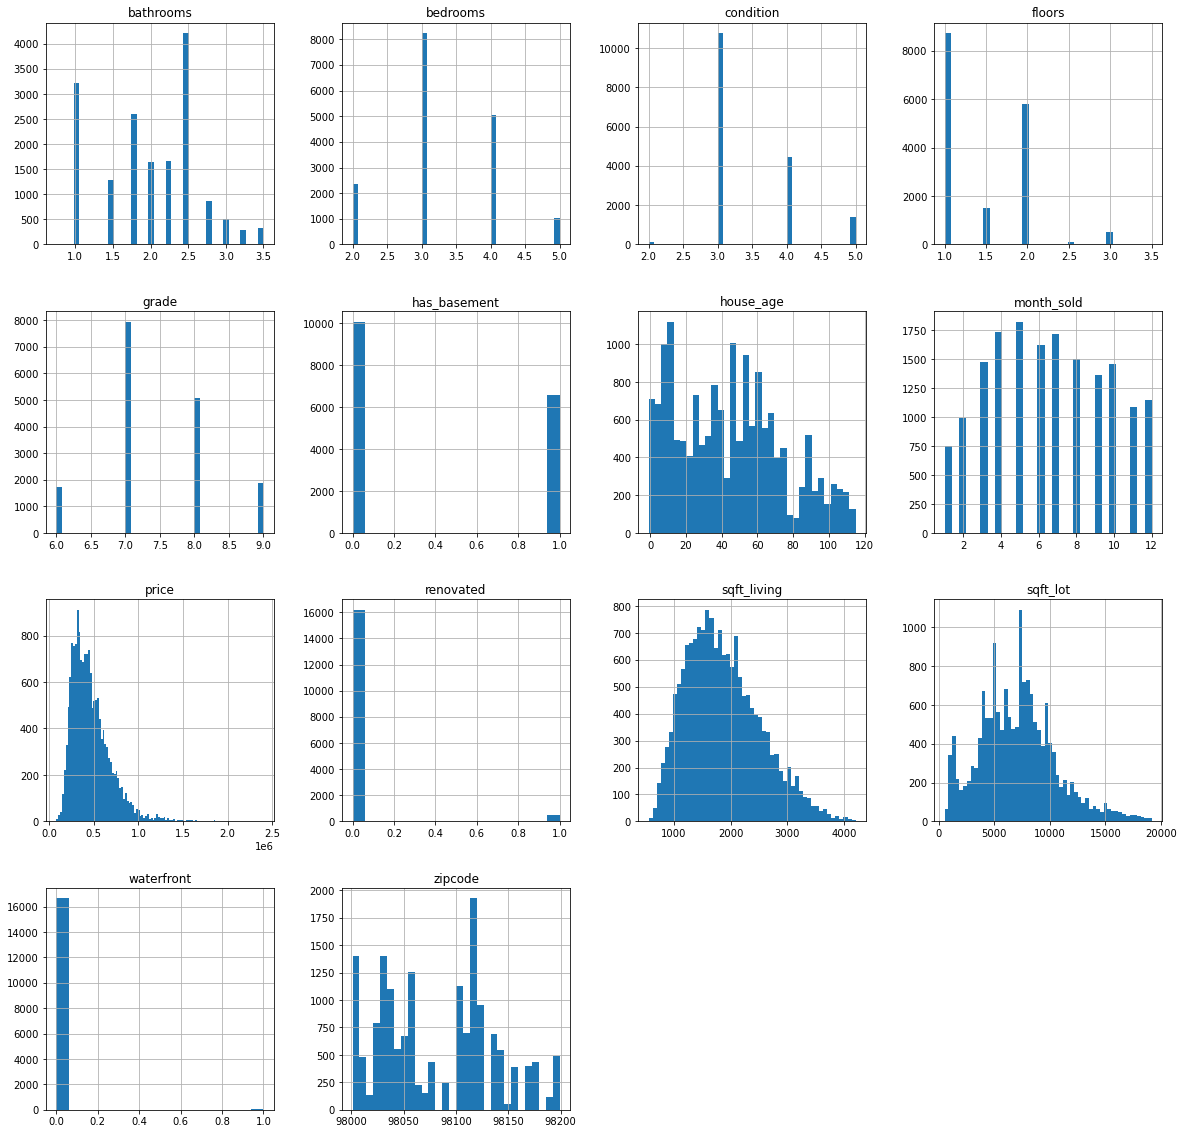

In [29]:
#Look at the distributions for the cleaned dataset
cleaned_data.hist(figsize=(20,20), bins="auto");
#While a few of the distributions have gotten more normal, many still are not

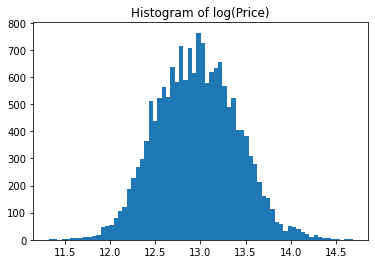

In [30]:
#transform the price data given its abnormal shape and the failure of our model to meet
#the assumptions 
cleaned_data["log_price"] = np.log(cleaned_data["price"])

#This histogram is far more normal 
plt.hist(cleaned_data["log_price"], bins="auto");
plt.title("Histogram of log(Price)");

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:37:50   Log-Likelihood:                 5392.8
No. Observations:               16668   AIC:                        -1.062e+04
Df Residuals:                   16587   BIC:                            -9998.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.8650      0.023    477.246      0.000      10.820      10.910
C(waterfront)[T.1.0]     0.7948      0.034     23.158      0.000       0.728       0.862
C(zipcode)[T.98002]     -0.0134      0.017     -0.786      0.432      -0.047       0.020
C(zipcode)[T.98003]      0.0223      0.015      1.446      0.148      -0.008       0.053
C(zipcode)[T.98004]      1.1052      0.017     64.218      0.000       1.071       1.139
C(zipcode)[T.98005]      0.7418      0.020     37.441      0.000       0.703       0.781
C(zipcode)[T.98006]      0.6463      0.015     43.909      0.000       0.617       0.675
C(zipcode)[T.98007]      0.6343      0.020     32.145      0.000       0.596       0.673
C(zipcode)[T.98008]      0.6503      0.016     41.891      0.000       0.620       0.681
C(zipcode)[T.98010]      0.1884      0.030      6.266      0.000       0.129       0.247
C(zipcode)[T.98011]      0.4566      0.017     26.500      0.000       0.423       0.490
C(zipcode)[T.98014]      0.2744      0.032      8.692      0.000       0.213       0.336
C(zipcode)[T.98019]      0.3426      0.019     18.418      0.000       0.306       0.379
C(zipcode)[T.98022]      0.0288      0.018      1.567      0.117      -0.007       0.065
C(zipcode)[T.98023]     -0.0332      0.014     -2.451      0.014      -0.060      -0.007
C(zipcode)[T.98024]      0.3809      0.040      9.574      0.000       0.303       0.459
C(zipcode)[T.98027]      0.6098      0.016     36.996      0.000       0.578       0.642
C(zipcode)[T.98028]      0.4183      0.016     26.851      0.000       0.388       0.449
C(zipcode)[T.98029]      0.6155      0.015     40.206      0.000       0.586       0.646
C(zipcode)[T.98030]      0.0568      0.016      3.632      0.000       0.026       0.087
C(zipcode)[T.98031]      0.0749      0.016      4.830      0.000       0.045       0.105
C(zipcode)[T.98032]     -0.0336      0.020     -1.671      0.095      -0.073       0.006
C(zipcode)[T.98033]      0.7680      0.014     53.183      0.000       0.740       0.796
C(zipcode)[T.98034]      0.5345      0.013     40.149      0.000       0.508       0.561
C(zipcode)[T.98038]      0.1766      0.013     13.173      0.000       0.150       0.203
C(zipcode)[T.98039]      1.2667      0.048     26.300      0.000       1.172       1.361
C(zipcode)[T.98040]      0.9124      0.018     50.559      0.000       0.877       0.948
C(zipcode)[T.98042]      0.0601      0.014      4.423      0.000       0.033       0.087
C(zipcode)[T.98045]      0.3185      0.019     17.128      0.000       0.282       0.355
C(zipcode)[T.98052]      0.6465      0.013     48.142      0.000       0.620       0.673
C(zipcode)[T.98053]      0.6737      0.016     41.240      0.000       0.642       0.706
C(zipcode)[T.98055]      0.1425      0.016      8.974    

The residuals are not normally distributed, p = 6.998113494093617e-272.
The model is heteroskedastic, p = 0.0.


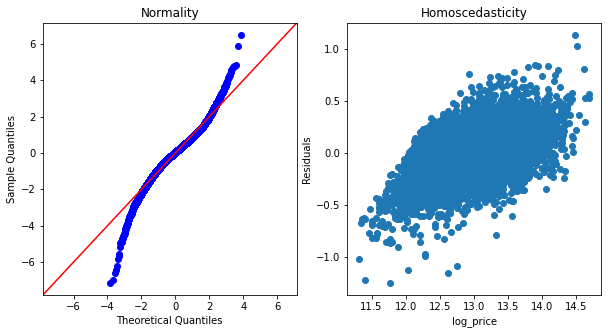

In [31]:
outcome = "log_price"
create_regression_and_check_assumptions(x_cols_2, outcome, cleaned_data)

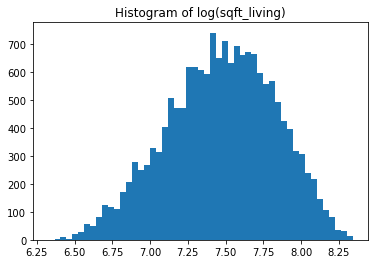

In [33]:
cleaned_data["log_sqft_living"] = np.log(cleaned_data["sqft_living"])
plt.hist(cleaned_data["log_sqft_living"], bins="auto");
plt.title("Histogram of log(sqft_living)");

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1125.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:38:06   Log-Likelihood:                 5357.6
No. Observations:               16668   AIC:                        -1.055e+04
Df Residuals:                   16587   BIC:                            -9928.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.6414      0.044    172.916      0.000       7.555       7.728
C(waterfront)[T.1.0]     0.7896      0.034     22.958      0.000       0.722       0.857
C(zipcode)[T.98002]     -0.0098      0.017     -0.573      0.566      -0.043       0.024
C(zipcode)[T.98003]      0.0239      0.015      1.547      0.122      -0.006       0.054
C(zipcode)[T.98004]      1.1133      0.017     64.547      0.000       1.079       1.147
C(zipcode)[T.98005]      0.7538      0.020     37.963      0.000       0.715       0.793
C(zipcode)[T.98006]      0.6643      0.015     45.027      0.000       0.635       0.693
C(zipcode)[T.98007]      0.6357      0.020     32.150      0.000       0.597       0.675
C(zipcode)[T.98008]      0.6525      0.016     41.942      0.000       0.622       0.683
C(zipcode)[T.98010]      0.1931      0.030      6.407      0.000       0.134       0.252
C(zipcode)[T.98011]      0.4633      0.017     26.835      0.000       0.429       0.497
C(zipcode)[T.98014]      0.2748      0.032      8.688      0.000       0.213       0.337
C(zipcode)[T.98019]      0.3476      0.019     18.650      0.000       0.311       0.384
C(zipcode)[T.98022]      0.0320      0.018      1.736      0.083      -0.004       0.068
C(zipcode)[T.98023]     -0.0280      0.014     -2.061      0.039      -0.055      -0.001
C(zipcode)[T.98024]      0.3951      0.040      9.909      0.000       0.317       0.473
C(zipcode)[T.98027]      0.6212      0.017     37.604      0.000       0.589       0.654
C(zipcode)[T.98028]      0.4246      0.016     27.194      0.000       0.394       0.455
C(zipcode)[T.98029]      0.6167      0.015     40.202      0.000       0.587       0.647
C(zipcode)[T.98030]      0.0546      0.016      3.480      0.001       0.024       0.085
C(zipcode)[T.98031]      0.0725      0.016      4.664      0.000       0.042       0.103
C(zipcode)[T.98032]     -0.0245      0.020     -1.215      0.224      -0.064       0.015
C(zipcode)[T.98033]      0.7787      0.014     53.808      0.000       0.750       0.807
C(zipcode)[T.98034]      0.5398      0.013     40.460      0.000       0.514       0.566
C(zipcode)[T.98038]      0.1770      0.013     13.181      0.000       0.151       0.203
C(zipcode)[T.98039]      1.2864      0.048     26.650      0.000       1.192       1.381
C(zipcode)[T.98040]      0.9275      0.018     51.284      0.000       0.892       0.963
C(zipcode)[T.98042]      0.0669      0.014      4.915      0.000       0.040       0.094
C(zipcode)[T.98045]      0.3219      0.019     17.274      0.000       0.285       0.358
C(zipcode)[T.98052]      0.6572      0.013     48.835      0.000       0.631       0.684
C(zipcode)[T.98053]      0.6712      0.016     40.988      0.000       0.639       0.703
C(zipcode)[T.98055]      0.1505      0.016      9.462    

The residuals are not normally distributed, p = 4.579333031507397e-235.
The model is heteroskedastic, p = 0.0.


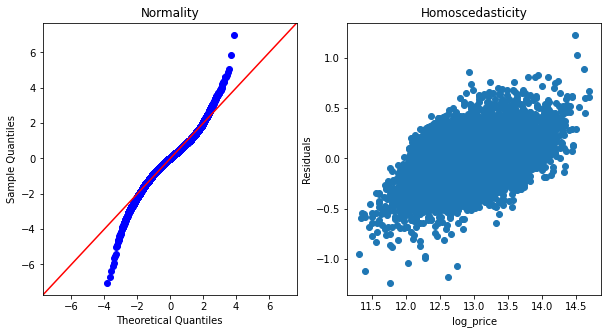

In [34]:
x_cols_3 = x_cols_2.copy()
x_cols_3.append("log_sqft_living")
x_cols_3.remove("sqft_living")
create_regression_and_check_assumptions(x_cols_3, outcome, cleaned_data)

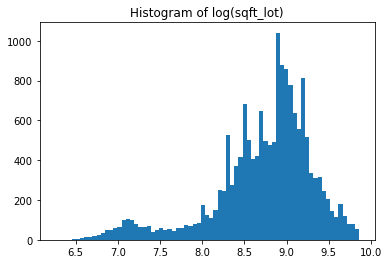

In [35]:
cleaned_data["log_sqft_lot"] = np.log(cleaned_data["sqft_lot"])
plt.hist(cleaned_data["log_sqft_lot"], bins="auto");
plt.title("Histogram of log(sqft_lot)");

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1148.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:38:36   Log-Likelihood:                 5500.6
No. Observations:               16668   AIC:                        -1.084e+04
Df Residuals:                   16587   BIC:                        -1.021e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.2246      0.047    152.155      0.000       7.132       7.318
C(waterfront)[T.1.0]     0.7905      0.034     23.184      0.000       0.724       0.857
C(zipcode)[T.98002]      0.0002      0.017      0.013      0.990      -0.033       0.033
C(zipcode)[T.98003]      0.0251      0.015      1.636      0.102      -0.005       0.055
C(zipcode)[T.98004]      1.1244      0.017     65.727      0.000       1.091       1.158
C(zipcode)[T.98005]      0.7648      0.020     38.847      0.000       0.726       0.803
C(zipcode)[T.98006]      0.6690      0.015     45.734      0.000       0.640       0.698
C(zipcode)[T.98007]      0.6454      0.020     32.905      0.000       0.607       0.684
C(zipcode)[T.98008]      0.6646      0.015     43.049      0.000       0.634       0.695
C(zipcode)[T.98010]      0.1845      0.030      6.177      0.000       0.126       0.243
C(zipcode)[T.98011]      0.4654      0.017     27.190      0.000       0.432       0.499
C(zipcode)[T.98014]      0.2715      0.031      8.669      0.000       0.210       0.333
C(zipcode)[T.98019]      0.3441      0.018     18.618      0.000       0.308       0.380
C(zipcode)[T.98022]      0.0341      0.018      1.867      0.062      -0.002       0.070
C(zipcode)[T.98023]     -0.0266      0.013     -1.975      0.048      -0.053      -0.000
C(zipcode)[T.98024]      0.3964      0.040     10.032      0.000       0.319       0.474
C(zipcode)[T.98027]      0.6433      0.016     39.156      0.000       0.611       0.675
C(zipcode)[T.98028]      0.4292      0.015     27.725      0.000       0.399       0.460
C(zipcode)[T.98029]      0.6324      0.015     41.598      0.000       0.603       0.662
C(zipcode)[T.98030]      0.0544      0.016      3.498      0.000       0.024       0.085
C(zipcode)[T.98031]      0.0730      0.015      4.739      0.000       0.043       0.103
C(zipcode)[T.98032]     -0.0214      0.020     -1.070      0.284      -0.061       0.018
C(zipcode)[T.98033]      0.7842      0.014     54.647      0.000       0.756       0.812
C(zipcode)[T.98034]      0.5450      0.013     41.203      0.000       0.519       0.571
C(zipcode)[T.98038]      0.1783      0.013     13.411      0.000       0.152       0.204
C(zipcode)[T.98039]      1.2956      0.048     27.079      0.000       1.202       1.389
C(zipcode)[T.98040]      0.9372      0.018     52.263      0.000       0.902       0.972
C(zipcode)[T.98042]      0.0690      0.013      5.118      0.000       0.043       0.095
C(zipcode)[T.98045]      0.3148      0.018     17.041      0.000       0.279       0.351
C(zipcode)[T.98052]      0.6616      0.013     49.584      0.000       0.635       0.688
C(zipcode)[T.98053]      0.6838      0.016     42.158      0.000       0.652       0.716
C(zipcode)[T.98055]      0.1600      0.016     10.144    

The residuals are not normally distributed, p = 4.633336440314783e-248.
The model is heteroskedastic, p = 0.0.


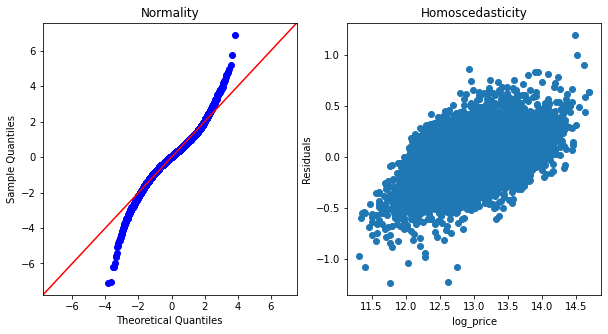

In [36]:
x_cols_3.append("log_sqft_lot")
x_cols_3.remove("sqft_lot")
create_regression_and_check_assumptions(x_cols_3, outcome, cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1163.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:38:57   Log-Likelihood:                 5500.3
No. Observations:               16668   AIC:                        -1.084e+04
Df Residuals:                   16588   BIC:                        -1.022e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.2292      0.047    153.720      0.000       7.137       7.321
C(waterfront)[T.1.0]     0.7912      0.034     23.211      0.000       0.724       0.858
C(zipcode)[T.98002]   8.164e-05      0.017      0.005      0.996      -0.033       0.033
C(zipcode)[T.98003]      0.0249      0.015      1.627      0.104      -0.005       0.055
C(zipcode)[T.98004]      1.1243      0.017     65.724      0.000       1.091       1.158
C(zipcode)[T.98005]      0.7644      0.020     38.847      0.000       0.726       0.803
C(zipcode)[T.98006]      0.6688      0.015     45.729      0.000       0.640       0.697
C(zipcode)[T.98007]      0.6452      0.020     32.900      0.000       0.607       0.684
C(zipcode)[T.98008]      0.6641      0.015     43.066      0.000       0.634       0.694
C(zipcode)[T.98010]      0.1849      0.030      6.192      0.000       0.126       0.243
C(zipcode)[T.98011]      0.4653      0.017     27.185      0.000       0.432       0.499
C(zipcode)[T.98014]      0.2718      0.031      8.680      0.000       0.210       0.333
C(zipcode)[T.98019]      0.3444      0.018     18.645      0.000       0.308       0.381
C(zipcode)[T.98022]      0.0340      0.018      1.862      0.063      -0.002       0.070
C(zipcode)[T.98023]     -0.0268      0.013     -1.990      0.047      -0.053      -0.000
C(zipcode)[T.98024]      0.3968      0.040     10.043      0.000       0.319       0.474
C(zipcode)[T.98027]      0.6434      0.016     39.166      0.000       0.611       0.676
C(zipcode)[T.98028]      0.4292      0.015     27.726      0.000       0.399       0.460
C(zipcode)[T.98029]      0.6323      0.015     41.597      0.000       0.603       0.662
C(zipcode)[T.98030]      0.0543      0.016      3.494      0.000       0.024       0.085
C(zipcode)[T.98031]      0.0730      0.015      4.737      0.000       0.043       0.103
C(zipcode)[T.98032]     -0.0213      0.020     -1.068      0.286      -0.060       0.018
C(zipcode)[T.98033]      0.7842      0.014     54.645      0.000       0.756       0.812
C(zipcode)[T.98034]      0.5448      0.013     41.198      0.000       0.519       0.571
C(zipcode)[T.98038]      0.1784      0.013     13.414      0.000       0.152       0.204
C(zipcode)[T.98039]      1.2956      0.048     27.080      0.000       1.202       1.389
C(zipcode)[T.98040]      0.9369      0.018     52.259      0.000       0.902       0.972
C(zipcode)[T.98042]      0.0689      0.013      5.107      0.000       0.042       0.095
C(zipcode)[T.98045]      0.3150      0.018     17.053      0.000       0.279       0.351
C(zipcode)[T.98052]      0.6615      0.013     49.581      0.000       0.635       0.688
C(zipcode)[T.98053]      0.6827      0.016     42.289      0.000       0.651       0.714
C(zipcode)[T.98055]      0.1599      0.016     10.138    

The residuals are not normally distributed, p = 3.344579496467181e-248.
The model is heteroskedastic, p = 0.0.


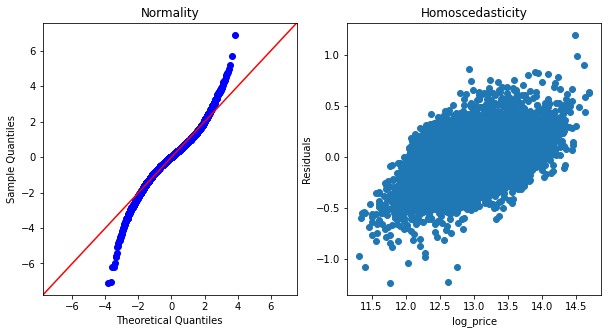

In [37]:
x_cols_3.remove("floors")
create_regression_and_check_assumptions(x_cols_3, outcome, cleaned_data)

In [38]:
df_train, df_test = train_test_split(cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     873.7
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:40:59   Log-Likelihood:                 4110.3
No. Observations:               12501   AIC:                            -8061.
Df Residuals:                   12421   BIC:                            -7466.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.2008      0.054    132.138      0.000       7.094       7.308
C(waterfront)[T.1.0]     0.7608      0.038     20.049      0.000       0.686       0.835
C(zipcode)[T.98002]      0.0111      0.019      0.583      0.560      -0.026       0.048
C(zipcode)[T.98003]      0.0410      0.018      2.332      0.020       0.007       0.076
C(zipcode)[T.98004]      1.1547      0.020     58.682      0.000       1.116       1.193
C(zipcode)[T.98005]      0.7755      0.023     34.273      0.000       0.731       0.820
C(zipcode)[T.98006]      0.6856      0.017     40.380      0.000       0.652       0.719
C(zipcode)[T.98007]      0.6632      0.022     29.481      0.000       0.619       0.707
C(zipcode)[T.98008]      0.6705      0.018     37.703      0.000       0.636       0.705
C(zipcode)[T.98010]      0.2142      0.034      6.371      0.000       0.148       0.280
C(zipcode)[T.98011]      0.4736      0.020     23.545      0.000       0.434       0.513
C(zipcode)[T.98014]      0.2909      0.037      7.864      0.000       0.218       0.363
C(zipcode)[T.98019]      0.3460      0.022     15.988      0.000       0.304       0.388
C(zipcode)[T.98022]      0.0401      0.021      1.938      0.053      -0.000       0.081
C(zipcode)[T.98023]     -0.0194      0.015     -1.265      0.206      -0.050       0.011
C(zipcode)[T.98024]      0.4646      0.052      8.947      0.000       0.363       0.566
C(zipcode)[T.98027]      0.6480      0.019     34.042      0.000       0.611       0.685
C(zipcode)[T.98028]      0.4353      0.018     24.252      0.000       0.400       0.470
C(zipcode)[T.98029]      0.6456      0.017     36.912      0.000       0.611       0.680
C(zipcode)[T.98030]      0.0583      0.018      3.209      0.001       0.023       0.094
C(zipcode)[T.98031]      0.0872      0.018      4.919      0.000       0.052       0.122
C(zipcode)[T.98032]     -0.0194      0.023     -0.856      0.392      -0.064       0.025
C(zipcode)[T.98033]      0.7916      0.017     47.779      0.000       0.759       0.824
C(zipcode)[T.98034]      0.5584      0.015     37.282      0.000       0.529       0.588
C(zipcode)[T.98038]      0.1960      0.015     12.881      0.000       0.166       0.226
C(zipcode)[T.98039]      1.3096      0.057     23.136      0.000       1.199       1.421
C(zipcode)[T.98040]      0.9450      0.021     45.950      0.000       0.905       0.985
C(zipcode)[T.98042]      0.0803      0.015      5.235      0.000       0.050       0.110
C(zipcode)[T.98045]      0.3203      0.021     15.373      0.000       0.279       0.361
C(zipcode)[T.98052]      0.6745      0.015     44.140      0.000       0.645       0.704
C(zipcode)[T.98053]      0.6924      0.019     36.791      0.000       0.655       0.729
C(zipcode)[T.98055]      0.1648      0.018      9.062    

The residuals are not normally distributed, p = 3.341269037587364e-192.
The model is heteroskedastic, p = 0.0.


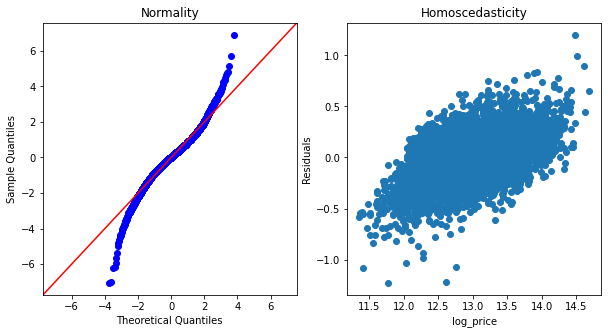

In [42]:
model_train = create_regression_and_check_assumptions(x_cols_3, outcome, df_train)

In [43]:
y_train_pred = model_train.predict(df_train)
y_test_pred = model_train.predict(df_test)

In [45]:
r2_train = r2_score(df_train["log_price"],y_train_pred )
r2_test = r2_score(df_test["log_price"],y_test_pred )

print(f"Training Score: {r2_train}")
print(f"Test Score: {r2_test}")

Training Score: 0.8474892597730018
Test Score: 0.8447652446865146
